# Project - Classification of Human Activities

Disciplina de Tópicos de Ciência de Dados

Joana Simões, nº 2019217013

In [6]:
# imports 
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score
import pandas as pd
from sklearn import preprocessing
import scipy
import os
import seaborn as sns
from skfeature.function.similarity_based import fisher_score, reliefF
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Exercise 1.1

In [8]:
def split_train_test(X, y, percentage_test=0.3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=percentage_test, random_state=42)
    return x_train, x_test, y_train, y_test

In [9]:
def split_train_test_validation(X, y, percentage_test=0.3, percentage_validation=0.3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=percentage_test, random_state=42)
    percent = (len(X)*percentage_validation) / len(x_train)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=percent, random_state=42)

    return x_train, x_val, x_test, y_train, y_val, y_test

In [10]:
def split_k_fold(X, y, k_folds):
    x_train = []
    x_test = []
    y_train = []
    y_test = []

    k_fold = KFold(n_splits=k_folds, random_state=42, shuffle=True)

    for train_index, test_index in k_fold.split(X):
        x_train.append(X.loc[train_index])
        y_train.append(y[train_index])
        x_test.append(X.loc[test_index])
        y_test.append(y[test_index])

    return x_train, x_test, y_train, y_test

## Exercise 1.2

In [11]:
def plot_percentages(classes_groups, labels=None, title=''):
    plt.figure()
    plt.pie(classes_groups, labels=labels, autopct='%.0f%%')
    plt.title(title)
    plt.show()

In [12]:
def display_confusion_matrix(cm, labels=None, title=''):
    plt.figure()
    display = ConfusionMatrixDisplay(cm, display_labels=labels)
    display.plot()
    plt.title(title)
    plt.show()

In [13]:
def calculate_confusion_matrix(y, y_pred, labels=None, display=True, title=''):
    cm = confusion_matrix(y, y_pred, labels=labels)
    if display:
        display_confusion_matrix(cm, labels, title=title)
    if not display:
        return cm

In [14]:
def calculate_recall(y, y_pred, metric=None):
    score = recall_score(y, y_pred, average=metric)
    return score

In [15]:
def calculate_precision(y, y_pred, metric=None):
    return precision_score(y, y_pred, average=metric)

In [16]:
def calculate_f1(y, y_pred, metric=None):
    return f1_score(y, y_pred, average=metric)

In [17]:
def plot_measures(recalls, precisions, f1_scores, title=''):
    plt.figure()
    x = np.arange(1, len(recalls)*2, 2)
    plt.plot(x, recalls, label='Recall')
    plt.plot(x, precisions, label='Precision')
    plt.plot(x, f1_scores, label='F1 score')
    plt.xlabel('K values')
    plt.ylabel('Result')
    plt.title(title)
    plt.legend()
    plt.show()

In [18]:
def load_dataset():
    iris_dataset = datasets.load_iris(as_frame=True)
    X = iris_dataset.data
    y = iris_dataset.target
    target_names = iris_dataset.target_names
    return X, y, target_names

In [20]:
def load_activities_dataset():
    features_path = os.path.join('results', 'extracted_features.csv')
    X = pd.read_csv(features_path)
    y = X.pop('activity')
    return X, y

In [19]:
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

## Exercise 2

Nos testes elaborados abaixo, foi utilizada a métrica do F1-score para comparar a performance de diferentes modelos (ou parâmetros deste). Foram utilizados apenas valor ímpares para o calculo do melhor número de vizinhos, uma vez que ambos para não existirem empates na escolha da classe a que um "ponto" pertence.

In [153]:
X_iris, y_iris, target_names = load_dataset()

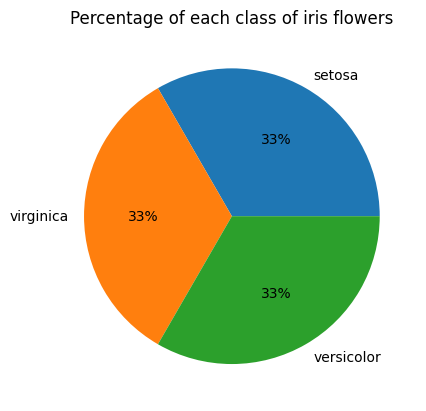

In [19]:
plot_percentages(y_iris.value_counts().sort_index(), labels=['setosa', 'virginica', 'versicolor'], title='Percentage of each class of iris flowers')

### Train-only : k=1

In [20]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_iris,  y_iris)
y_pred = model.predict(X_iris)

Recall: 1.0
Precision: 1.0
F1 score: 1.0


<Figure size 640x480 with 0 Axes>

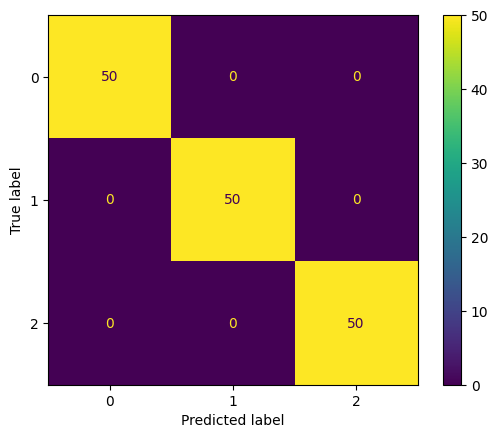

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [21]:
print('Recall:', calculate_recall(y_iris, y_pred, 'weighted'))
print('Precision:',calculate_precision(y_iris, y_pred, 'weighted'))
print('F1 score:',calculate_f1(y_iris, y_pred, 'weighted'))
calculate_confusion_matrix(y_iris, y_pred)

Ao utilizar os mesmos dados para treino e teste, e com um K=1 no *K-nearest neighbors*, ou seja, utilizando o valor do próprio ponto, como era de esperar, o resultado é que o modelo consegue prever todas as classes na totalidade. Isto acontece porque o modelo está a dar overfitting do dataset, ou seja, está a aprender todos os pontos do dataset, originando boas previsões.

### Train-test 70-30 - k=1

In [29]:
x_train, x_test, y_train, y_test = split_train_test(X_iris, y_iris, 0.3)

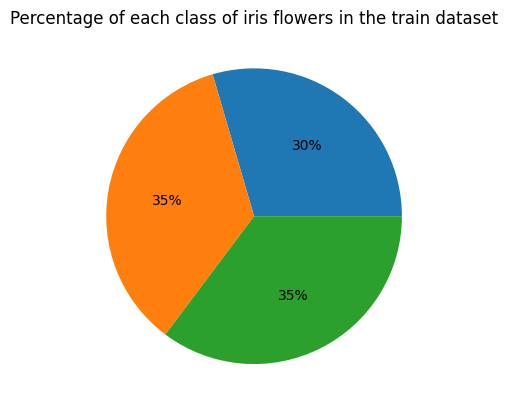

In [30]:
plot_percentages(list(y_train.value_counts().sort_index()), title='Percentage of each class of iris flowers in the train dataset')

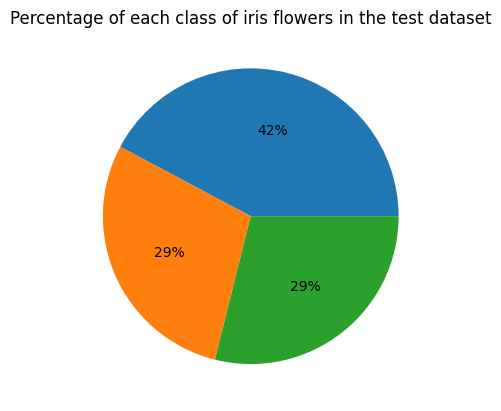

In [31]:
plot_percentages(list(y_test.value_counts().sort_index()), title='Percentage of each class of iris flowers in the test dataset')


Recall: 1.0
Precision: 1.0
F1 score: 1.0


<Figure size 640x480 with 0 Axes>

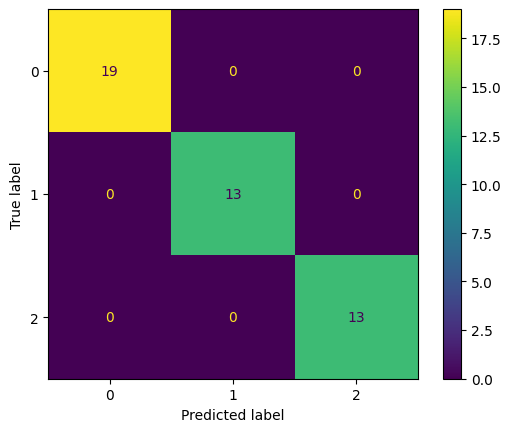

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [32]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:',calculate_precision(y_test, y_pred, 'weighted'))
print('F1 score:',calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred)

Utilizando 70% do dataset para treino e 30% do dataset para teste, e havendo uma distribuição mais ou menos uniforme de cada classe nos dois datasets, é possível observar que o modelo K-nearest neighbors com um k=1, ou seja, utilizando apenas o ponto mais próximo na predição, obtm bons resultados nos testes, havendo assim uma boa relação entre bias e variância, ou seja, não temos nem overfitting nem underfitting.

### 10CV - k=1

In [155]:
def cross_validation_test(iters, X, y, k_folds=10):
    iters_recalls = []
    iters_precisions = []
    iters_f1_scores = []
    x_train, x_test, y_train, y_test = split_k_fold(X, y, k_folds)
    for iter in range(1, iters+1, 2):
        recalls = []
        precisions = []
        f1_scores = []
        for i in range(len(x_train)):
            model = KNeighborsClassifier(n_neighbors=iter)
            model.fit(x_train[i], y_train[i])
            y_pred = model.predict(x_test[i])

            recalls.append(calculate_recall(y_test[i], y_pred))
            precisions.append(calculate_precision(y_test[i], y_pred))
            f1_scores.append(calculate_f1(y_test[i], y_pred))
        r_mean = np.mean(recalls)
        p_mean = np.mean(precisions)
        f_mean = np.mean(f1_scores)
        print(f'********* Averages - k={iter} **********')
        print('Recall:', r_mean)
        print('Precision:',p_mean)
        print('F1 Score:', f_mean)

        iters_recalls.append(r_mean)
        iters_precisions.append(p_mean)
        iters_f1_scores.append(f_mean)
    if iters > 1:
        plot_measures(iters_recalls, iters_precisions, iters_f1_scores)
        print('Best k')
        print('Recall: ', 2*np.argmax(iters_recalls)+1)
        print('Precision: ', 2*np.argmax(iters_precisions)+1)
        print('F1-Score: ', 2*np.argmax(iters_f1_scores)+1)
        return 2*np.argmax(f1_scores)+1
    return 2*np.argmax(f1_scores)+1


In [34]:
bests = cross_validation_test(1, X_iris, y_iris)

********* Averages - k=1 **********
Recall: 0.9607936507936509
Precision: 0.9615079365079366
F1 Score: 0.9588337588337589


Ao utilizar cross-validation com 10 folds e um modelo KNN com k=1, observa-se que o erro aumentou em relação aos testes anteriores. Ou seja, tanto pode estar a existir overfitting dos dados sobre os K-folds, uma vez que estamos a utilizar em todos os splits, apenas 10% dos dados para teste, ou seja, em cada iteração, o modelo é bom a prever nos dados treinados, mas quando lhe damos novos dados, ele não é capaz de generalizar as previões, tendo um bias alto baixos nos dados de treino, mas alto nos dados de teste.

### Train only - multiple k values

In [37]:
def train_only_test(iters, X, y):
    recalls = []
    precisions = []
    f1_scores = []
    for i in range(1, iters+1, 2):
        model = KNeighborsClassifier(n_neighbors = i)
        model.fit(X, y)
        y_pred = model.predict(X)
        recall = calculate_recall(y, y_pred, 'weighted')
        recalls.append(recall)
        precision = calculate_precision(y, y_pred,  'weighted')
        precisions.append(precision)
        f1 = calculate_f1(y, y_pred,  'weighted')
        f1_scores.append(f1)
        print(f'********* Averages - k={i} **********')
        print('Recall:', recall)
        print('Precision:',precision)
        print('F1 Score:', f1)
    if iters > 1:
        plot_measures(recalls, precisions, f1_scores)
        print('Best k')
        print('Recall: ', 2*np.argmax(recalls)+1)
        print('Precision: ', 2*np.argmax(precisions)+1)
        print('F1-Score: ', 2*np.argmax(f1_scores)+1)
        return 2*np.argmax(f1_scores)+1

********* Averages - k=1 **********
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
********* Averages - k=3 **********
Recall: 0.96
Precision: 0.96
F1 Score: 0.96
********* Averages - k=5 **********
Recall: 0.9666666666666667
Precision: 0.9667867146858743
F1 Score: 0.9666633329999667
********* Averages - k=7 **********
Recall: 0.9733333333333334
Precision: 0.9738247863247864
F1 Score: 0.9733226623982927
********* Averages - k=9 **********
Recall: 0.98
Precision: 0.980125383486728
F1 Score: 0.9799979997999799
********* Averages - k=11 **********
Recall: 0.9733333333333334
Precision: 0.9733333333333334
F1 Score: 0.9733333333333334
********* Averages - k=13 **********
Recall: 0.98
Precision: 0.980125383486728
F1 Score: 0.9799979997999799
********* Averages - k=15 **********
Recall: 0.9866666666666667
Precision: 0.9866666666666667
F1 Score: 0.9866666666666667


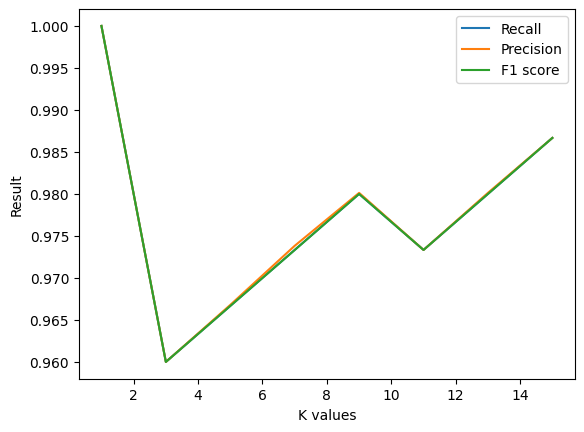

Best k
Recall:  1
Precision:  1
F1-Score:  1


In [38]:
best_k_train_only = train_only_test(15, X_iris, y_iris)

In [39]:
model = KNeighborsClassifier(n_neighbors=best_k_train_only)
model.fit(X_iris, y_iris)
y_pred = model.predict(X_iris)

Recall: 1.0
Precision: 1.0
F-Score: 1.0


<Figure size 640x480 with 0 Axes>

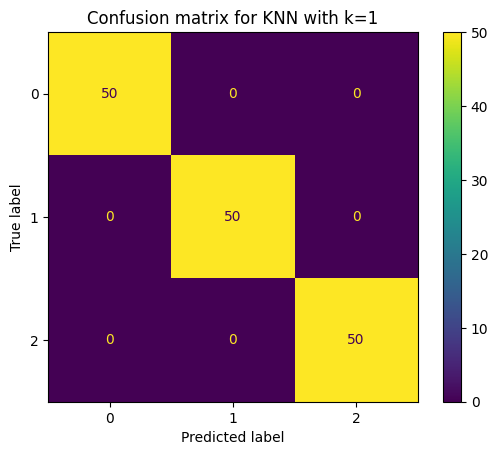

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [41]:
print('Recall:', calculate_recall(y_iris, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_iris, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_iris, y_pred, 'weighted'))
calculate_confusion_matrix(y_iris, y_pred, title=f'Confusion matrix for KNN with k={best_k_train_only}')

Utilizando os mesmos dados para treino e teste mostra que o melhor k do K-nearest neighbors continua a ser o K=1, uma vez que como são os mesmos dados, o modelo dá overfitting deste, ou seja, aprende todos os pontos que utlizou para treino e como preve nos mesmos dados, tem uma boa performance. No entanto, se fosssem apredentados dados diferentes ao modelo, ele já teria dificuldade em prever os novos pontos.

### TVT 40-30-30 - multiple k values

In [149]:
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(X_iris, y_iris)

In [43]:
def tvt_test(iters, x_train, x_val, y_train, y_val):
    recalls = []
    precisions = []
    f1_scores = []
    for i in range(1, iters+1, 2):
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)
        recall = calculate_recall(y_val, y_pred, 'weighted')
        recalls.append(recall)
        precision = calculate_precision(y_val, y_pred,  'weighted')
        precisions.append(precision)
        f1 = calculate_f1(y_val, y_pred,  'weighted')
        f1_scores.append(f1)
        print(f'********* Averages - k={i} **********')
        print('Recall:', recall)
        print('Precision:',precision)
        print('F1 Score:', f1)

    if iters > 1:
        plot_measures(recalls, precisions, f1_scores)
        print('Best k')
        print('Recall: ', 2*np.argmax(recalls)+1)
        print('Precision: ', 2*np.argmax(precisions)+1)
        print('F1-Score: ', 2*np.argmax(f1_scores)+1)
        return 2*np.argmax(f1_scores)+1

********* Averages - k=1 **********
Recall: 0.9111111111111111
Precision: 0.9111111111111111
F1 Score: 0.9111111111111111
********* Averages - k=3 **********
Recall: 0.9555555555555556
Precision: 0.9611111111111111
F1 Score: 0.955648148148148
********* Averages - k=5 **********
Recall: 0.9333333333333333
Precision: 0.9450980392156864
F1 Score: 0.9333333333333333
********* Averages - k=7 **********
Recall: 0.9333333333333333
Precision: 0.9450980392156864
F1 Score: 0.9333333333333333
********* Averages - k=9 **********
Recall: 0.9333333333333333
Precision: 0.9450980392156864
F1 Score: 0.9333333333333333
********* Averages - k=11 **********
Recall: 0.9333333333333333
Precision: 0.9450980392156864
F1 Score: 0.9333333333333333
********* Averages - k=13 **********
Recall: 0.9333333333333333
Precision: 0.9450980392156864
F1 Score: 0.9333333333333333
********* Averages - k=15 **********
Recall: 0.9333333333333333
Precision: 0.9450980392156864
F1 Score: 0.9333333333333333


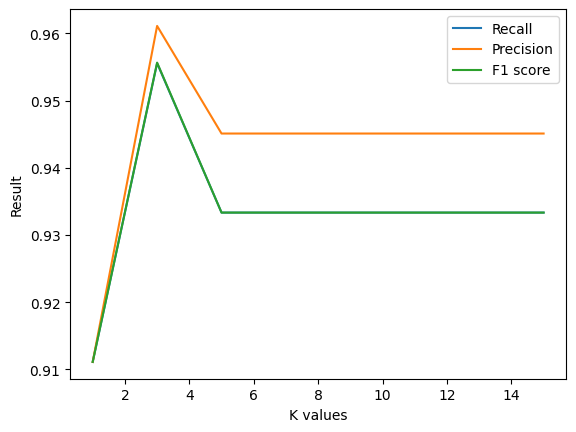

Best k
Recall:  3
Precision:  3
F1-Score:  3


In [44]:
best_k = tvt_test(15, x_train, x_val, y_train, y_val)

Ao utilizar um 40% dados para treino, 30% para validação e 30% para teste, verifica-se que o melhor k para o KNN é o K=3.

#### retrain the model using the best k

In [45]:
x_train_total = pd.concat([x_train, x_val], ignore_index=True)
y_train_total = pd.concat([y_train, y_val], ignore_index=True)

In [46]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_total, y_train_total)
y_pred = model.predict(x_test)

Recall: 1.0
Precision: 1.0
F-Score: 1.0


<Figure size 640x480 with 0 Axes>

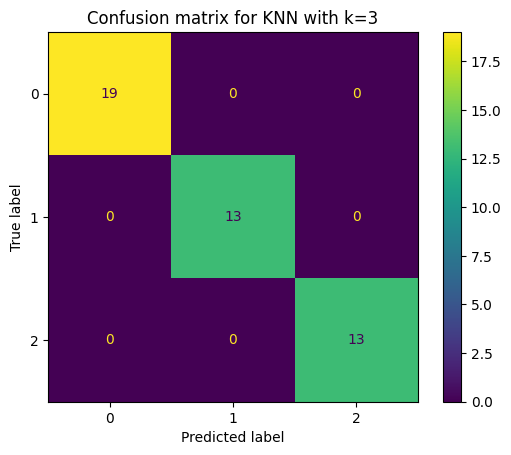

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [47]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, title=f'Confusion matrix for KNN with k={best_k}')

Neste teste, foi utilizado 40% do dataset para teste e 30% do dataset para validação. Com os datasets treino e validação, foi calculado o melhor k para o modelo, sendo este o k=3 como referido anteriormente. Após calcular o melhor k, juntaram-se os dois datasets (treino e validação) e o modelo foi novamente treinado com o k ideal. Por último,foi utilizado 30% do dataset inicial previamente guardado e foi testada a precisão do modelo. Como se pode observar, o modelo consegue prever com exatidão a totalidade dos dados de teste, obtendo boa performance tanto enquanto estava a treinar o modelo como a prever as flores do dataset de teste. Neste caso, o modelo está a utilizar uma boa relação dos de bias e varância nos dados previsos, ou seja, não está a "aprender" os dados de treino, pelo que é bom a generalizar o modelo para prever os dados de teste.

### 10 CV - multiple k values

********* Averages - k=1 **********
Recall: 0.9607936507936509
Precision: 0.9615079365079366
F1 Score: 0.9588337588337589
********* Averages - k=3 **********
Recall: 0.9663492063492064
Precision: 0.9738095238095238
F1 Score: 0.964938764938765
********* Averages - k=5 **********
Recall: 0.9730158730158731
Precision: 0.9785714285714285
F1 Score: 0.9712065712065712
********* Averages - k=7 **********
Recall: 0.9552380952380953
Precision: 0.9585714285714285
F1 Score: 0.9487991637991638
********* Averages - k=9 **********
Recall: 0.9746825396825397
Precision: 0.9754761904761905
F1 Score: 0.9723461723461725
********* Averages - k=11 **********
Recall: 0.9746825396825397
Precision: 0.9754761904761905
F1 Score: 0.9723461723461725
********* Averages - k=13 **********
Recall: 0.9746825396825397
Precision: 0.9754761904761905
F1 Score: 0.9723461723461725
********* Averages - k=15 **********
Recall: 0.9691269841269842
Precision: 0.9704761904761905
F1 Score: 0.9651383801383803


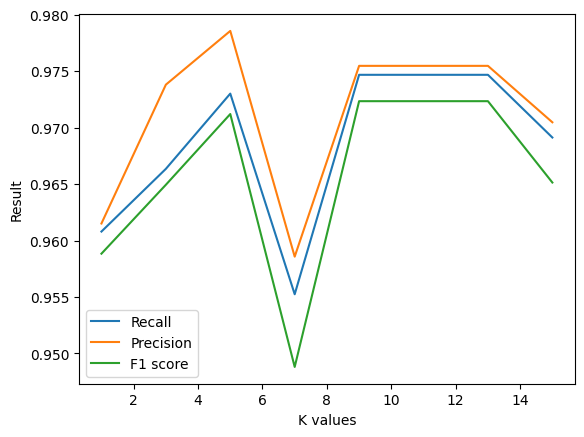

Best k
Recall:  9
Precision:  5
F1-Score:  9


In [157]:
best_k_cv = cross_validation_test(15, X_iris, y_iris, k_folds=10)

Como se pode observar o k=9 é o que obtêm os melhores resultados nas médias dos resultados da cross-validation para todas as métricas.

Neste caso o modelo não foi novamente retreinado, uma vez que o melhor k foi calculado através de cross-valiadation, ou seja, pela média dos diferentes folds para cada k. No entanto, para os valores resultantes, observa-se que o modelo nunca consegue prever com total exatidão os dados de teste em cada fold, pelo que poderá estar a dar overfitting dos dados de treino, não conseguindo generalizar para os dados de teste.

## ReliefF - Ex.2.2

In [21]:
def plot_elbow(f1_scores, k_model, metric=None, title=None, xlabel=None):
    f1_scores = [0] + f1_scores
    plt.figure()
    plt.plot(np.arange(len(f1_scores)), f1_scores, '*-')
    plt.ylim(0, 1.05)
    plt.xlim(0, len(f1_scores) + 0.2)
    if title is None:
        plt.title(f'Plot with the features used, using the model KNN with k={k_model}, features ranked using {metric}')
    else:
        plt.title(title)
    plt.ylabel(f'F1 score')
    if xlabel is None:
        plt.xlabel(f'Nº features used')
    else:
        plt.xlabel(xlabel)
    plt.show()

In [22]:
def plot_elbows(scores, k_values):
    plt.figure(figsize=(15, 7))
    x = np.arange(0, len(scores[0])+1)
    x = x.astype(int)
    for k in range(len(k_values)):
        plt.plot(x, [0] + scores[k], '*-', label=k_values[k])
    plt.legend()
    plt.xlabel('Number features used')
    plt.ylim(0, 1.05)
    plt.xlim(0, len(scores[0])+0.2)
    plt.ylabel('F1-Score')
    plt.title('F1-scores for each value of K in the KNN and number of features used')
    plt.show()

In [23]:
def order_features(x_train, y_train, metric='reliefF'):
    if metric == 'reliefF':
        # ReliefF
        print('reliefF')
        score = reliefF.reliefF(x_train.to_numpy(), y_train.to_numpy())
    else:
        # fisher
        print('fisher')
        score = fisher_score.fisher_score(x_train.to_numpy(), y_train.to_numpy())
    
    features_ranked = (-score).argsort()
    features = x_train.columns

    print(f'Features ranked by {metric}:')
    print(list(features[features_ranked]))
    print(f'Scores:')
    print(score)

    return list(features[features_ranked])

In [24]:
def best_model_feature_and_k(x_train, x_val, y_train, y_val, features, function='ReliefF', plot=False, k_max=15, step=2):
    df = pd.DataFrame()

    max_score = 0
    best_k = 0
    best_n_features = 0

    features_scores = []
    k_values = []

    for k in range(1, k_max+1, step):
        f1_scores = []
        for n_features in range(1, len(features)+1):
            features_to_use = features[:n_features]
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(x_train[features_to_use], y_train)
            y_pred = model.predict(x_val[features_to_use])
            f1 = calculate_f1(y_val, y_pred,  'weighted')
            if f1 > max_score:
                max_score = f1
                best_k = k
                best_n_features = n_features
            f1_scores.append(f1)
        features_scores.append(f1_scores)
        k_values.append(k)
        df[f'K{k}'] = pd.Series(np.array(f1_scores))
        if plot:
            plot_elbow(f1_scores, k, function)

    plot_elbows(features_scores, k_values)

    df = df.set_index(np.arange(1, len(features)+1))
    print('Max f1-score: ', max_score)
    print('Best k: ', best_k)
    print('Best number features:', best_n_features)
    return df, best_k, best_n_features

In [25]:
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(X_iris, y_iris)

In [26]:
relieff_features = order_features(x_train, y_train)

reliefF
Features ranked by reliefF:
['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']
Scores:
[178.42897187 115.47781074 563.99357289 238.41156522]


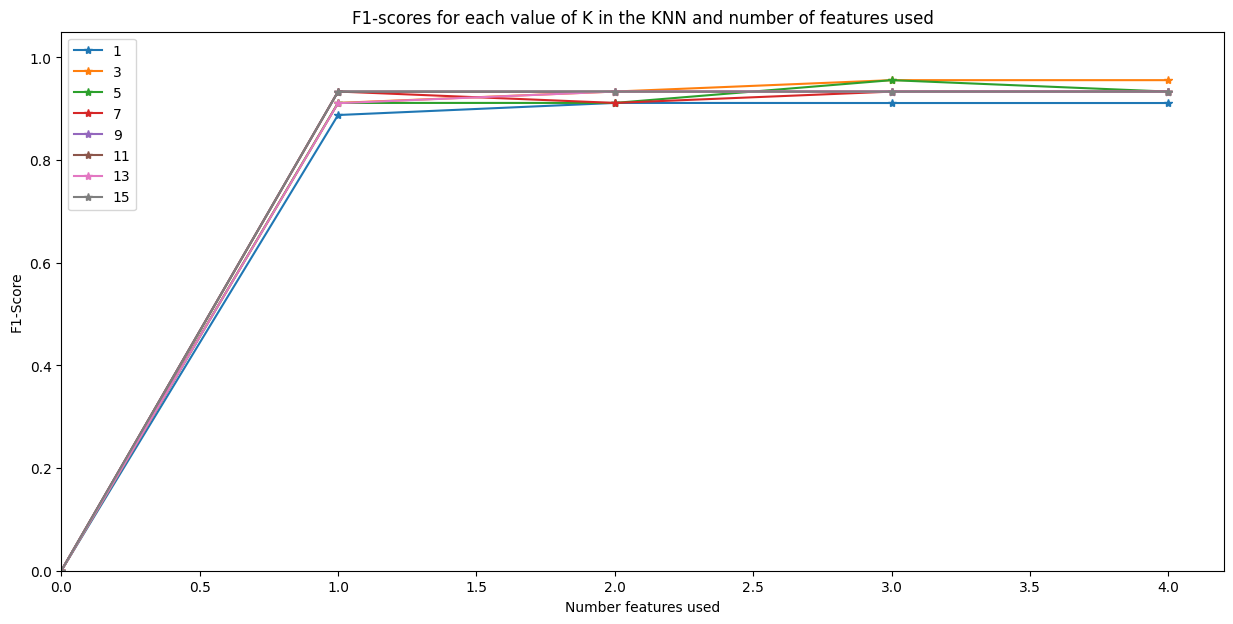

Max f1-score:  0.955648148148148
Best k:  3
Best number features: 3


In [27]:
results, best_k, best_n_features_relief = best_model_feature_and_k(x_train, x_val, y_train, y_val, relieff_features, plot=False)

Ao utilizar o TVT para calcular o melhor número de features (ordenadas por importância segundo o ReliefF) e o melhor k, é possível observar que os resultados obtidos são semelhantes para todos os k e para todos os nºs de features utilizadas, no entanto, utlizando contata-se que apenas são necessárias as primerias 3 features para distinguir as flores.

In [28]:
results

,K1,K3,K5,K7,K9,K11,K13,K15
1,0.887728,0.911296,0.911296,0.933473,0.933333,0.933333,0.910741,0.933333
2,0.911296,0.933473,0.911296,0.911296,0.933333,0.933333,0.933473,0.933333
3,0.911111,0.955648,0.955648,0.933333,0.933333,0.933333,0.933333,0.933333
4,0.911111,0.955648,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333


#### retrain best model

In [29]:
x_train_total = pd.concat([x_train, x_val], ignore_index=True)
y_train_total = pd.concat([y_train, y_val], ignore_index=True)

In [30]:
features_to_use = relieff_features[:best_n_features_relief]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 1.0
Precision: 1.0
F-Score: 1.0


<Figure size 640x480 with 0 Axes>

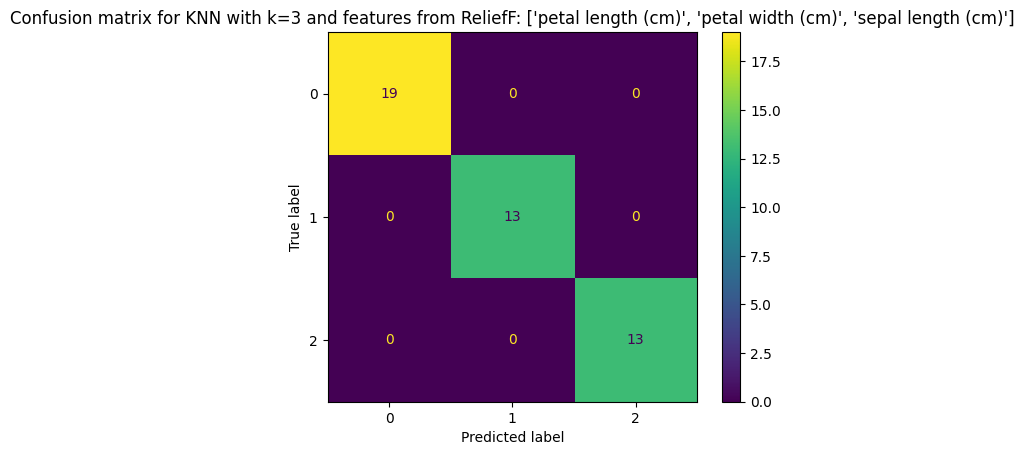

In [31]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, title=f'Confusion matrix for KNN with k={best_k} and features from ReliefF: {features_to_use}')

Como se pode observar, quando generalizá-mos o modelo, eles continuou a obter bons resultados, pelo que tem uma boa relação entre bias e variância. 

## Fisher Score - Ex.2.3

In [60]:
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(X_iris, y_iris)

In [61]:
fisher_features = order_features(x_train, y_train, 'fisher')

fisher
Features ranked by fisher:
['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']
Scores:
[ 1.35226876  0.92830557 16.80956604 10.94547513]


É possível observar que a importância das features é a mesma, tanto utilizandoo ReliefF como o Fisher Score.

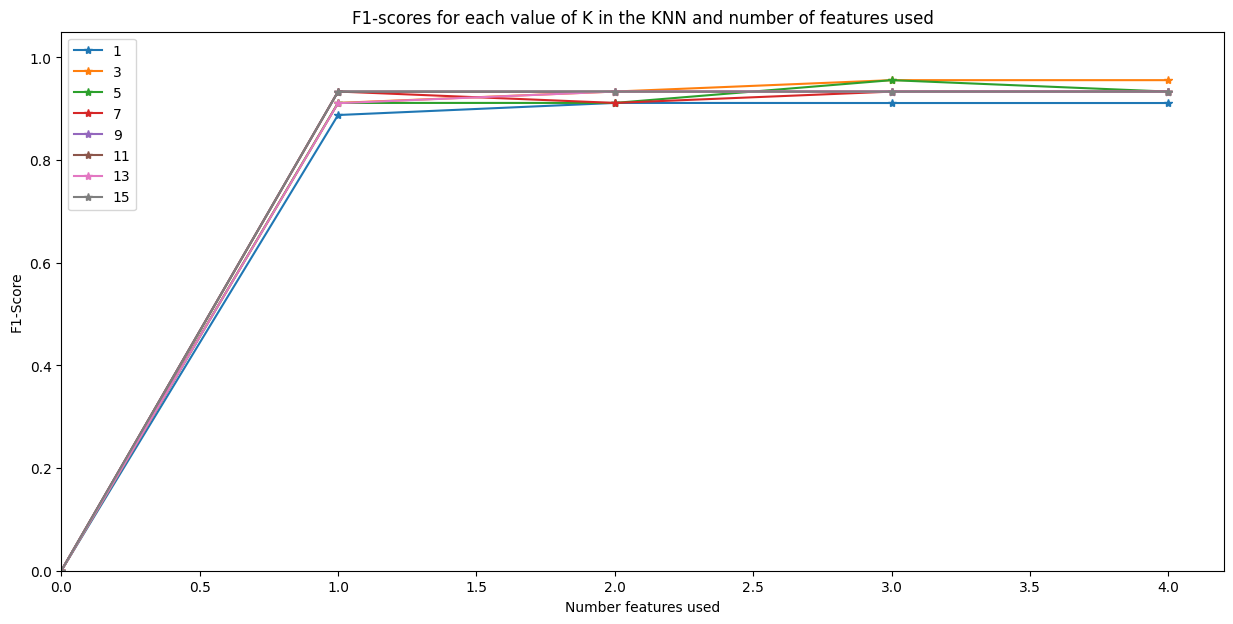

Max f1-score:  0.955648148148148
Best k:  3
Best number features: 3


In [65]:
results, best_k, best_n_features_fisher = best_model_feature_and_k(x_train, x_val, y_train, y_val, fisher_features, plot=False)

In [66]:
results

,K1,K3,K5,K7,K9,K11,K13,K15
1,0.887728,0.911296,0.911296,0.933473,0.933333,0.933333,0.910741,0.933333
2,0.911296,0.933473,0.911296,0.911296,0.933333,0.933333,0.933473,0.933333
3,0.911111,0.955648,0.955648,0.933333,0.933333,0.933333,0.933333,0.933333
4,0.911111,0.955648,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333


#### retrain best model

In [67]:
x_train_total = pd.concat([x_train, x_val], ignore_index=True)
y_train_total = pd.concat([y_train, y_val], ignore_index=True)

In [68]:
features_to_use = fisher_features[:best_n_features_fisher]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 1.0
Precision: 1.0
F-Score: 1.0


<Figure size 640x480 with 0 Axes>

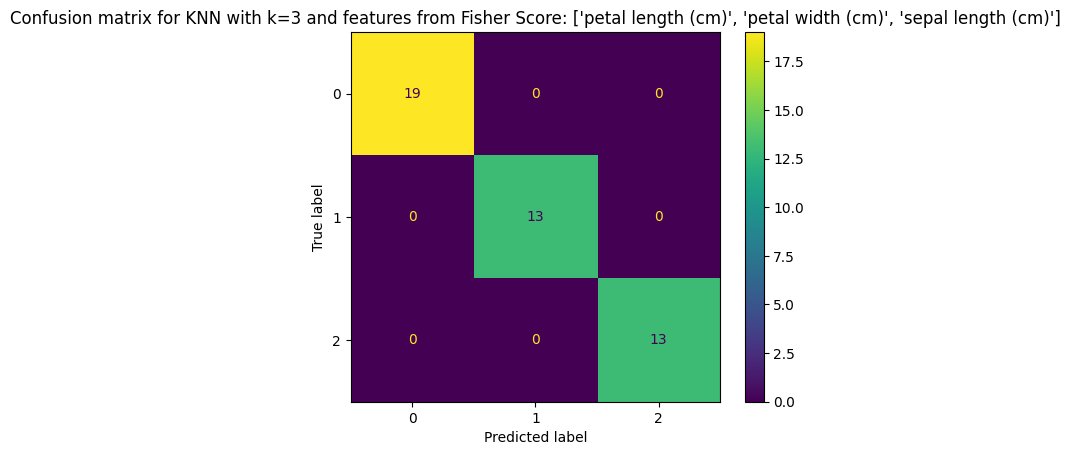

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [69]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, title=f'Confusion matrix for KNN with k={best_k} and features from Fisher Score: {features_to_use}')

In [73]:
relieff_features[:best_n_features_relief]

['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']

In [74]:
fisher_features[:best_n_features_fisher]

['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']

Como a ordem de importância das features utilizando o Fisher Score e RelieF foram iguais, os resultados de melhor nº de features a utilizar e melhor K são iguais também, pelo que o modelo continua a ter uma boa generalização para os dados de testes, classificando corretamente todas as flores no dataset de teste.

## Ex 2.4 - restrict classes

In [70]:
indexes_setosa = pd.Series(y_iris[y_iris==0].index)
indexes_versicolor = pd.Series(y_iris[y_iris == 1].index).sample(30)
indexes_virginica = pd.Series(y_iris[y_iris==2].index).sample(10)

In [71]:
new_X = pd.concat([X_iris.loc[indexes_setosa], X_iris.loc[indexes_versicolor], X_iris.loc[indexes_virginica]], ignore_index=True)
new_y = pd.concat([y_iris[indexes_setosa], y_iris[indexes_versicolor], y_iris[indexes_virginica]], ignore_index=True)

In [75]:
classes_groups = list(new_y.value_counts().sort_index())

In [76]:
labels = ['setosa', 'virsicolor', 'virginica']

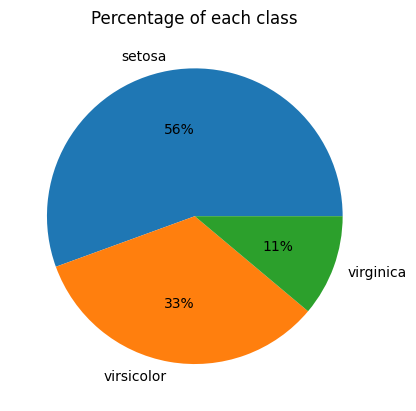

In [77]:
plt.figure()
plt.pie(classes_groups, labels=labels, autopct='%.0f%%')
plt.title('Percentage of each class')
plt.show()

In [78]:
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(new_X, new_y)

In [79]:
fisher_features = order_features(x_train, y_train, 'fisher')

fisher
Features ranked by fisher:
['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']
Scores:
[ 1.84962109  0.45532074 20.70152158 20.71064195]


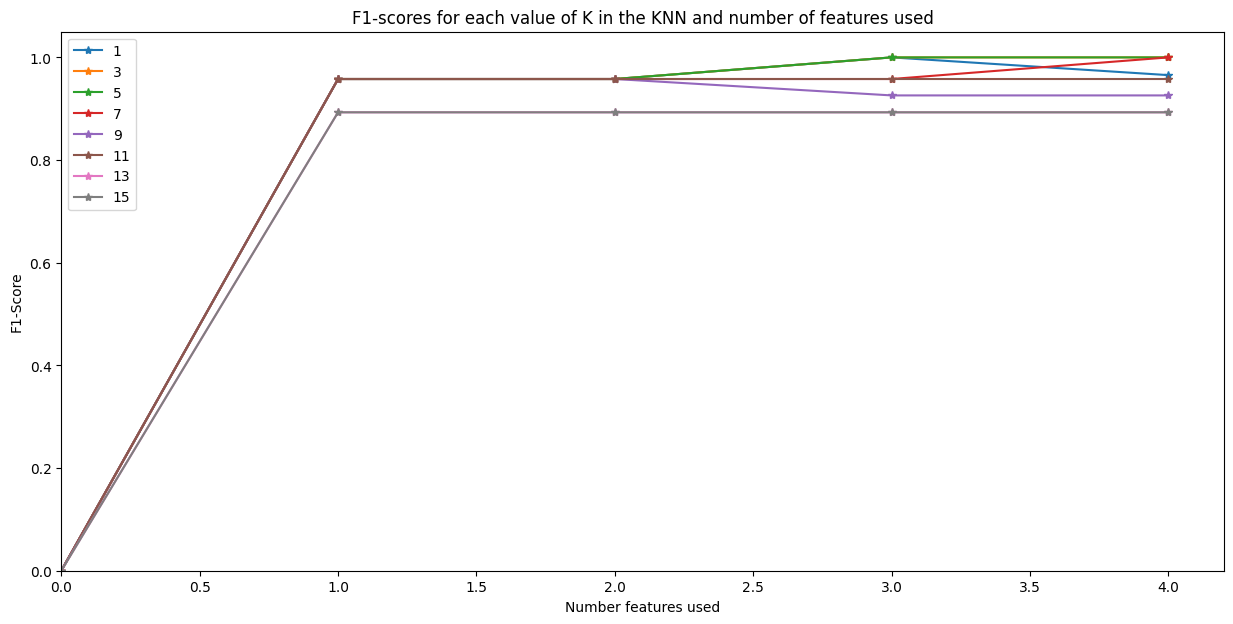

Max f1-score:  1.0
Best k:  1
Best number features: 3


In [80]:
results, best_k, best_n_features = best_model_feature_and_k(x_train, x_val, y_train, y_val, fisher_features, plot=False)

In [81]:
results

,K1,K3,K5,K7,K9,K11,K13,K15
1,0.957879,0.957879,0.957879,0.957879,0.957879,0.957879,0.893004,0.893004
2,0.957879,0.957879,0.957879,0.957879,0.957879,0.957879,0.893004,0.893004
3,1.000000,1.000000,1.000000,0.957879,0.925926,0.957879,0.893004,0.893004
4,0.965432,1.000000,1.000000,1.000000,0.925926,0.957879,0.893004,0.893004


#### retrain best model

In [82]:
x_train_total = pd.concat([x_train, x_val], ignore_index=True)
y_train_total = pd.concat([y_train, y_val], ignore_index=True)

In [85]:
features_to_use = fisher_features[:best_n_features]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 0.9259259259259259
Precision: 0.9259259259259259
F-Score: 0.9259259259259259


<Figure size 640x480 with 0 Axes>

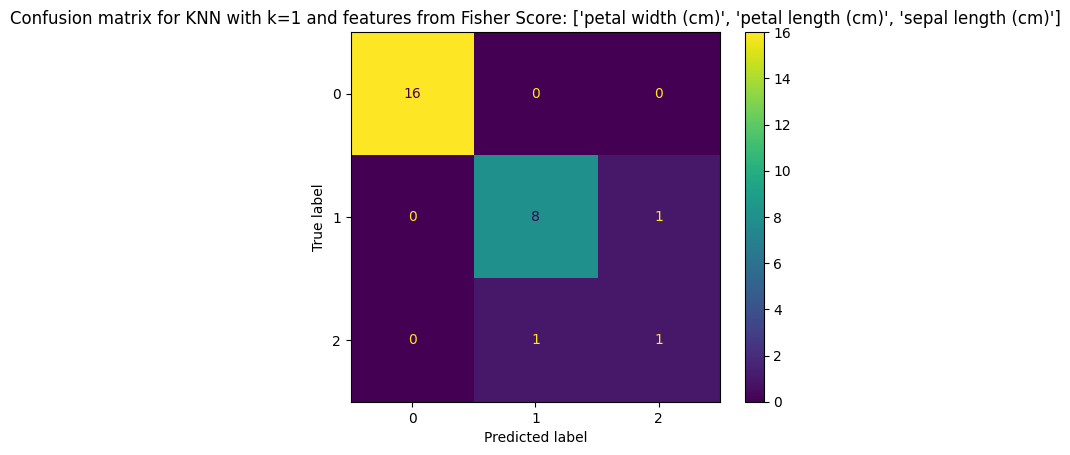

array([[16,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  1]], dtype=int64)

In [86]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, title=f'Confusion matrix for KNN with k={best_k} and features from Fisher Score: {features_to_use}')

Verifica-se que ao pertubar as percentagens de cada tipo de flor no dataset, ou seja, ficando com um dataset desenbalaceado, a performance do modelo diminui quando comparado com os anteriores.

## Ex 3 - test in the human activities dataset

In [25]:
activities_labels = {
    1 : 'STAND',
    2 : 'SIT',
    3 : 'SIT&TALK',
    4 : 'WALK',
    5 : 'WALK&TALK',
    6 : 'CLIMB_STAIRS',
    7 : 'CLIMB_STAIRS&TALK',
    8 : 'STAND_TO_SIT',
    9 : 'SIT_TO_STAND',
    10: 'STAND_TO_SIT&TALK',
    11: 'SIT&TALK_TO_STAND',
    12: 'STAND_TO_WALK', 
    13: 'WALK_TO_STAND', 
    14: 'STAND_TO_CLIMB_STAIRS',
    15: 'CLIMB_STAIRS_TO_WALK',
    16: 'CLIMB_STAIRS&TALK_TO_WALK&TALK', 
}

In [26]:
X, y = load_activities_dataset()

In [27]:
data_activities = pd.DataFrame()
data_activities['activity'] = list(activities_labels.values())
data_activities['count'] = y.value_counts().sort_index()

In [28]:
def plot_hist(data, title=''):
    plt.figure()
    ax = sns.barplot(x=list(data.value_counts().sort_index().index), y=list(data.value_counts().sort_index()))
    for i in ax.containers:
        ax.bar_label(i,)
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title(title)

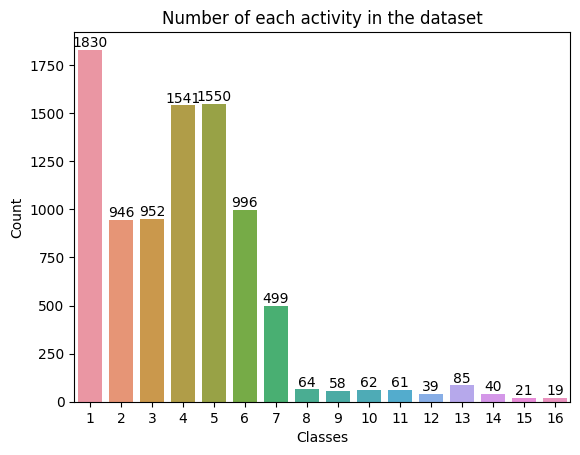

In [29]:
plot_hist(y, title='Number of each activity in the dataset')

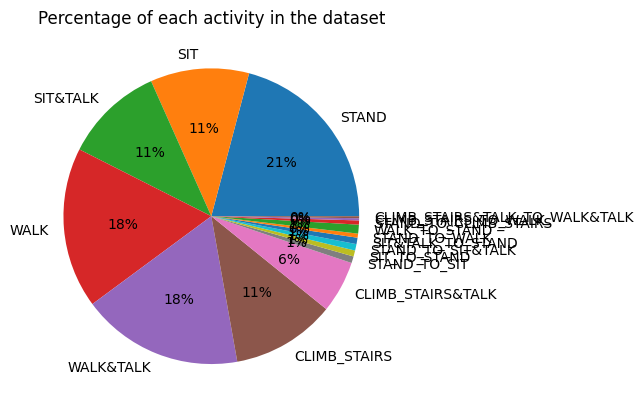

In [30]:
plot_percentages(list(y.value_counts().sort_index()), labels=list(activities_labels.values()), title='Percentage of each activity in the dataset')

Como se pode observar, não existe uma distribuição uniforme das atividades, algumas atividades existem em mais abundância que outras, podendo prever já há partida que o modelo terá dificildade em classificar as atividades.

In [31]:
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(X, y)

In [51]:
x_train_total = pd.concat([x_train, x_val], ignore_index=True)
y_train_total = pd.concat([y_train, y_val], ignore_index=True)

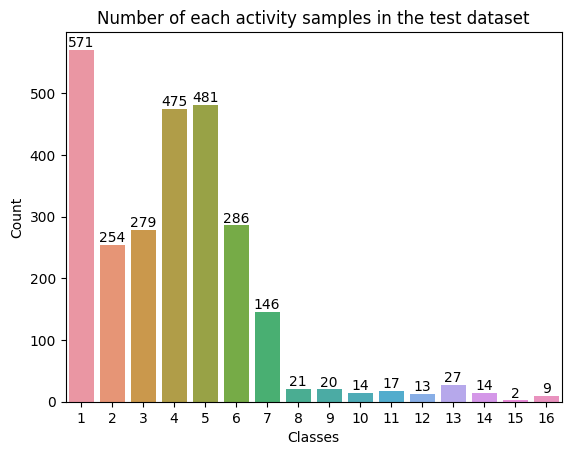

In [32]:
plot_hist(y_test, title='Number of each activity samples in the test dataset')

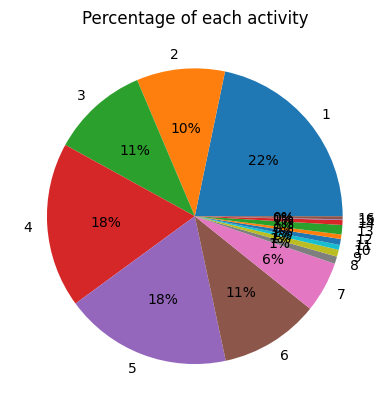

In [33]:
plot_percentages(list(y_test.value_counts().sort_index()), labels=list(y_test.value_counts().sort_index().index), title='Percentage of each activity')

Como se pode observar, o dataset não está balenceado, pele que pode já prever que a classificação das atividades não será muito correta.

In [34]:
%%time
relieff_features = order_features(x_train, y_train)

reliefF
Features ranked by reliefF:
['are', 'aae', 'accelerometer_x_energy', 'accelerometer_y_energy', 'accelerometer_z_energy', 'gyroscope_x_energy', 'gyroscope_y_energy', 'gyroscope_z_energy', 'magnetometer_x_energy', 'magnetometer_y_energy', 'magnetometer_z_energy', 'gyroscope_x_variance', 'gyroscope_y_variance', 'gyroscope_z_variance', 'avg', 'gyroscope_z_df', 'gyroscope_x_df', 'gyroscope_x_interquantile', 'gyroscope_y_interquantile', 'accelerometer_x_df', 'gyroscope_y_rms', 'gyroscope_y_df', 'gyroscope_x_std', 'gyroscope_x_rms', 'gyroscope_y_std', 'accelerometer_z_df', 'gyroscope_y_mean', 'gyroscope_y_median', 'accelerometer_z_mean_crossing_rate', 'magnetometer_z_mean_crossing_rate', 'accelerometer_y_mean_crossing_rate', 'magnetometer_x_mean_crossing_rate', 'gyroscope_z_interquantile', 'gyroscope_z_mean_crossing_rate', 'gyroscope_x_mean_crossing_rate', 'gyroscope_y_mean_crossing_rate', 'accelerometer_x_mean_crossing_rate', 'magnetometer_y_mean_crossing_rate', 'gyroscope_z_rms', 'g

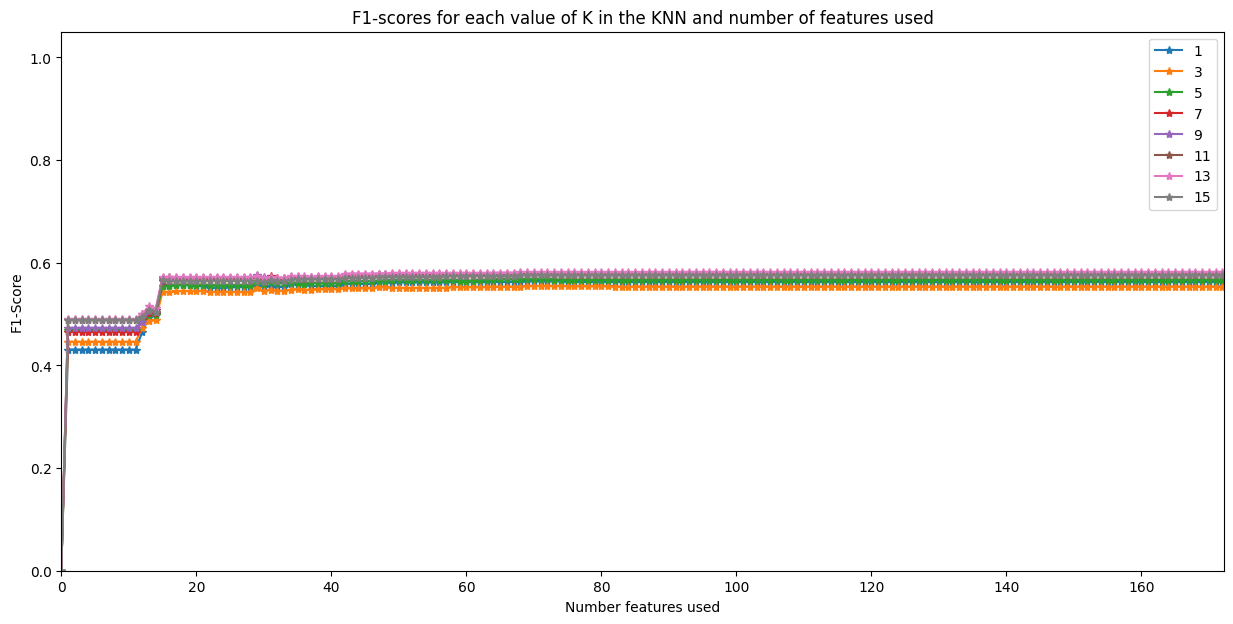

Max f1-score:  0.581995024774082
Best k:  13
Best number features: 92
CPU times: total: 19min 14s
Wall time: 4min 55s


In [155]:
%%time
results, best_k, best_n_features = best_model_feature_and_k(x_train, x_val, y_train, y_val, relieff_features, plot=False)

Pelo gráfico com os resultados do F1-score para os diferentes K do KNN e para X, sendo X o número de features a utilizar segundo o ReliefF, observa-se que a apartir de um certo ponto, o valor do F1-Score pouco se altera.
É tambem possível o K=13 para o KNN é o que aparenta ter os melhores resultados, para qualquer número de features utilizadas. 

Uma vez que os resultados pouco se alteram, e mesmo que o melhor modelo utilize um k=13 e as primeiras 92 duas features, talvez não compense utilizar tantas features, já que a melhoria é significativa, pelo que a seguir se realizaram teste sobre se realmente são precisas tantas features ou não.

#### retrain best model - 92 features

In [162]:
features_to_use = relieff_features[:best_n_features]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 0.5983263598326359
Precision: 0.5613018273224198
F-Score: 0.5760401062645587


<Figure size 640x480 with 0 Axes>

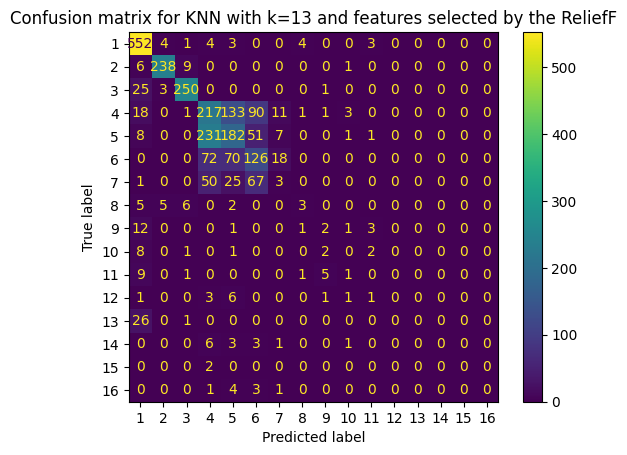

In [163]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, labels=range(1, 16+1), title=f'Confusion matrix for KNN with k={best_k} and features selected by the ReliefF')

Como era de esperar, verifica-se que o modelo tem dificuldade classificar a maioria das classes. As classes que estavam em menor quantidade no dataset, são todas classificadas erradamente, sendo que a maioria é classificada como uma das classes que aparece em maior número no dataset. 

Outro facto que pode contribuir para esta má classificação, é as atividades terem valores semelhantes nas diferentes features, e isso estar a enganar o modelo.

##### Retrain model - 47 features

In [35]:
features_to_use = relieff_features[:47]

In [171]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 0.5979459870673259
Precision: 0.5611369973200926
F-Score: 0.5758693097869406


<Figure size 640x480 with 0 Axes>

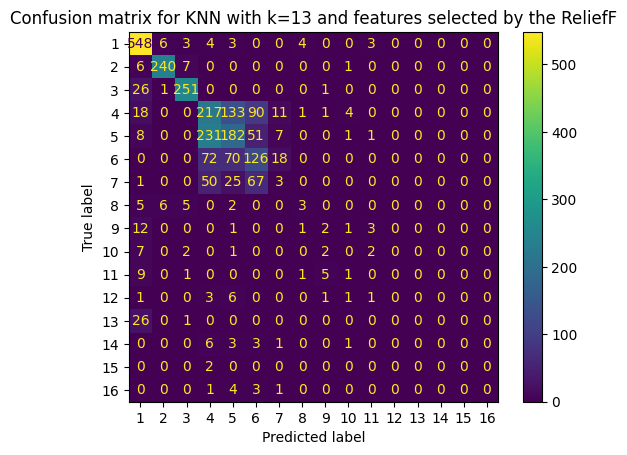

In [172]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, labels=range(1, 16+1), title=f'Confusion matrix for KNN with k={best_k} and features selected by the ReliefF')

Verifica-se que mesmo reduzindo o número de features de 92 para apenas 47, a performance do modelo mantém-se igual. Assim, como este valor é menor, ou seja, diminui-mos a dimensionalidade e complexidade do modelo, nos seguintes testes iremos utilizar apenas as primeiras 47 features.

## Ex.4 - Neural Network

In [36]:
def best_model(x_train, x_val, y_train, y_val, features, function='ReliefF', learning_rate='constant', step=10, max_units=500):
    max_score = 0
    best_k = 0
    scores = []
    units_list = []
    for units in range(len(features), max_units, step):
        model = MLPClassifier(hidden_layer_sizes=(units,), activation='logistic', learning_rate=learning_rate)
        model.fit(x_train[features], y_train)
        y_pred = model.predict(x_val[features])
        f1 = calculate_f1(y_val, y_pred,  'weighted')
        scores.append(f1)
        units_list.append(units)
        if f1 > max_score:
            max_score = f1
            best_k = units
    

    plt.figure()
    plt.plot(units_list, scores, '*-')
    plt.ylim(0, 1.05)
    plt.xlabel('No. units')
    plt.ylabel('f1-score')
    plt.title('F1-score of each number of units in the hidden layer')
    plt.show()

    print('Max f1-score: ', max_score)
    print('Best no. of neurons: ', best_k,)
    df = pd.DataFrame()
    df['f1-score'] = scores
    df['units'] = units_list
    return (df, best_k)

### Iris Dataset

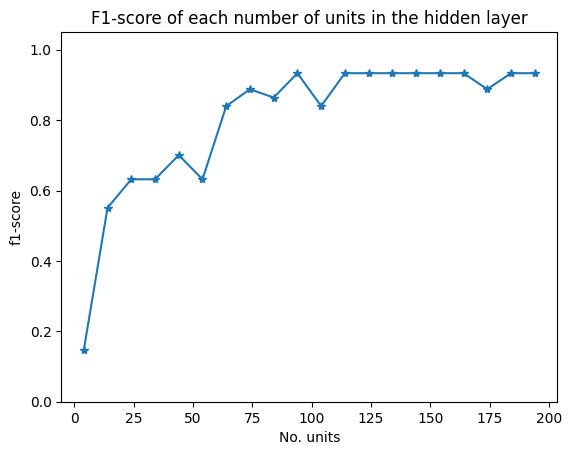

Max f1-score:  0.9333333333333333
Best no. of neurons:  94


In [135]:
X_iris, y_iris, _ = load_dataset()
# X_iris = normalize(X_iris)
x_train_iris, x_val_iris, x_test_iris, y_train_iris, y_val_iris, y_test_iris = split_train_test_validation(X_iris, y_iris)
df, best_units_iris = best_model(x_train_iris, x_val_iris, y_train_iris, y_val_iris, list(x_train_iris.columns), step=10, max_units=200)

In [132]:
df

,f1-score,units
0,0.147646,4
1,0.593227,14
2,0.593227,24
3,0.814625,34
4,0.667493,44
5,0.631852,54
6,0.760721,64
7,0.887728,74
8,0.933333,84
9,0.933333,94


#### retrain best model

In [136]:
model = MLPClassifier(hidden_layer_sizes=(best_units_iris,), activation='logistic', learning_rate='constant')
x_total_iris = pd.concat([x_train_iris, x_val_iris], ignore_index=True)
y_total_iris = pd.concat([y_train_iris, y_val_iris], ignore_index=True)
model.fit(x_total_iris, y_total_iris)
y_pred = model.predict(x_test_iris)

Recall: 1.0
Precision: 1.0
F-Score: 1.0


<Figure size 640x480 with 0 Axes>

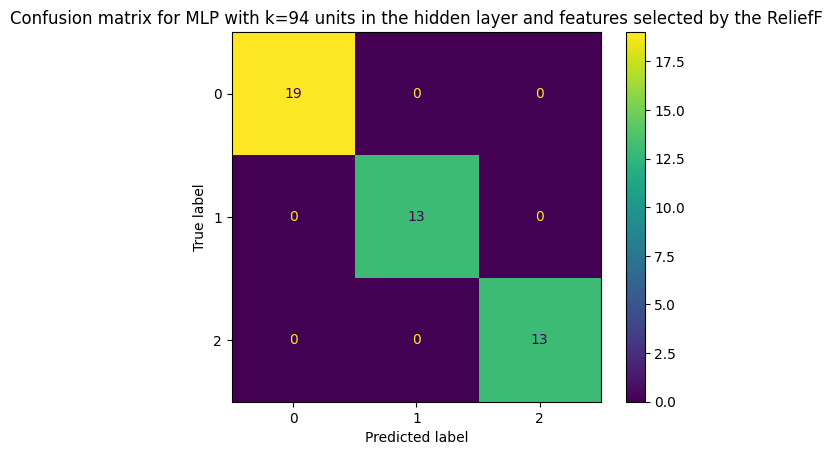

In [137]:
print('Recall:', calculate_recall(y_test_iris, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test_iris, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test_iris, y_pred, 'weighted'))
calculate_confusion_matrix(y_test_iris, y_pred,title=f'Confusion matrix for MLP with k={best_units_iris} units in the hidden layer and features selected by the ReliefF')

Apesar de ser recomendado normalizar as features antes de treinar as redes neuronais, ao treinar a MLP com as features normalizadas verificou-se a perfomance diminuia, optando-se então por não normalizar as features.  

### Human activities dataset

#### Fixed Learning rate

In [56]:
X, y = load_activities_dataset()
X = normalize(X)
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(X, y)

x_train_total = pd.concat([x_train, x_val], ignore_index=True)
y_train_total = pd.concat([y_train, y_val], ignore_index=True)

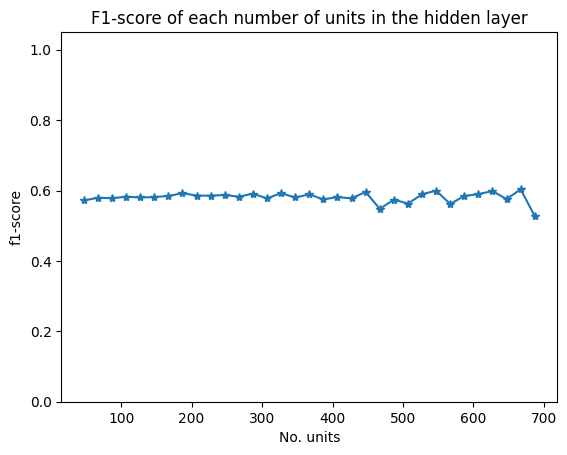

Max f1-score:  0.6034374801110332
Best no. of neurons:  667
CPU times: total: 3min 35s
Wall time: 9min 4s


In [39]:
%%time
df, best_n_units = best_model(x_train, x_val, y_train, y_val, features_to_use, step=20, max_units=700)

In [50]:
df[df['f1-score'] > 0.59]

,f1-score,units
7,0.592375,187
12,0.591095,287
14,0.592369,327
20,0.596229,447
25,0.599802,547
29,0.598538,627
31,0.603437,667


Verifica-se que o modelo MLP tem uma baixo F1-score. Para calcular o melhor modelo, foram testados diferentes números de neurónios na hidden layer, para as features já selecionadas anteriormente. Observa-se que que os resultados rondam sempre os 0.58-0.60, e observando o número de neurónios utilizados para os melhores f1-score, verifica-se que talvez não compense utilizar uma rede tão complexa com 667 neurónios, apesar de ter sido o número de neurónios com melhor resultado.

##### Retrain model - 667 neurons

In [61]:
%%time
model = MLPClassifier(hidden_layer_sizes=(best_n_units,), activation='logistic', learning_rate='constant')
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

CPU times: total: 14.8 s
Wall time: 47.7 s


Recall: 0.6432103461392165
Precision: 0.6018727096470189
F-Score: 0.6053785907836989


<Figure size 640x480 with 0 Axes>

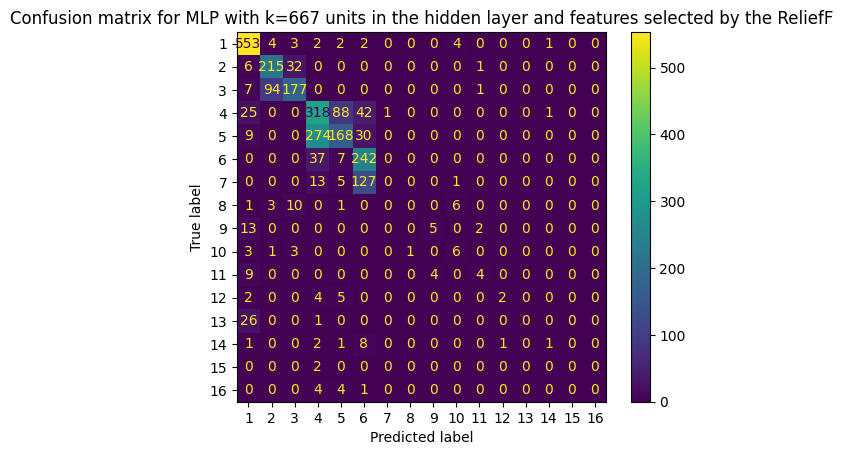

In [62]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, labels=range(1, 16+1), title=f'Confusion matrix for MLP with k={best_n_units} units in the hidden layer and features selected by the ReliefF')

O modelo final de MLP, com 667 neurónios na camada escondida, tem uma baixa exatidão, pela matriz de confusão. As razões para isto já foram descritas anteriormente: (i) o dataset não está balanceado, havendo certas actividades com muito mais amostras que outras; (ii) o modelo pode estar com dificuldade em distinguir certas actividades porque serem muito semelhantes.

Pelos resultados obtidos, o modelo atingiu apenas um F1-score de 0.60, e pela matrix de confusão é possível observar a maior parte das amostras são consideradas como as atividades que aparecem mais vezes no dataset. 

É ainda possível observar que o modelo está com alguma dificuldade em em distinguir entre as atividades 4 e 5, duas atividades muito semelhantes, uma vez que em ambas os utilizadores estão a andar, havendo apenas diferença de em uma os utilizadores também estarem a falar. 

##### Retrain model - 187 neurons

In [66]:
%%time
model = MLPClassifier(hidden_layer_sizes=(187,), activation='logistic', learning_rate='constant')
model.fit(x_train_total[features_to_use], y_train_total)
y_pred_2 = model.predict(x_test[features_to_use])

CPU times: total: 7.77 s
Wall time: 20.5 s


Recall: 0.6523392925066566
Precision: 0.6122225585098457
F-Score: 0.6198643801259197


<Figure size 640x480 with 0 Axes>

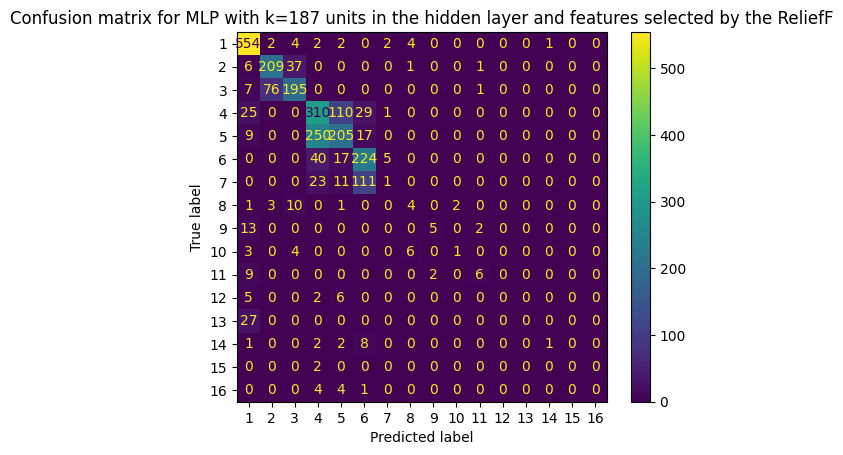

In [67]:
print('Recall:', calculate_recall(y_test, y_pred_2, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred_2, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred_2, 'weighted'))
calculate_confusion_matrix(y_test, y_pred_2, labels=range(1, 16+1), title=f'Confusion matrix for MLP with k={187} units in the hidden layer and features selected by the ReliefF')

Testanto o modelo com um número inferior de neurónios, verifica-se que, ao contrário do que foi anteriormente observado quando se testou vários valores de neurónios, que utilizando apenas 187 neurónios, o modelo tem um resultado de F1-score ligeiramente melhor, tendo ainda a vantagem de criar um modelo menos complexo que o anterior.

No entanto, verifica-se na mesma que o modelo tem dificuldade em distinguir certas atividades.

#### Adaptative learning rate

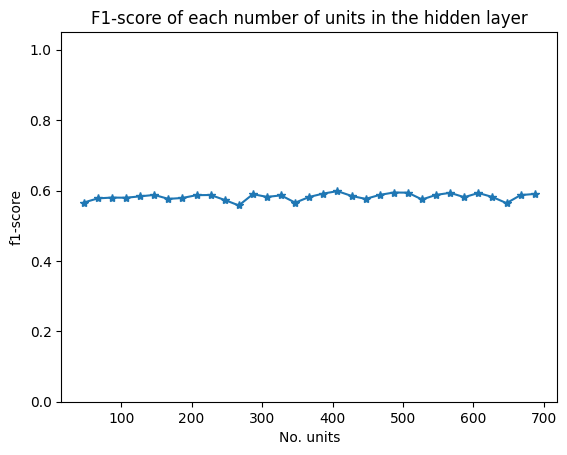

Max f1-score:  0.5982497244840435
Best no. of neurons:  407
CPU times: total: 2min 55s
Wall time: 9min 9s


In [69]:
%%time
df, best_n_units_adapt = best_model(x_train, x_val, y_train, y_val, features_to_use, learning_rate='invscaling', step=20, max_units=700)

Ao utilizar um learning rate variável, observa-se que os resultados do F1 diminuem. Este facto pode dever-se a que estarmos a utilizar poucas épocas para treinar o modelo, pelo que necessitaria de mais para fazer um bom treino do modelo, uma vez o learning rate vai variando, e demora mais tempo a chegar aos mínimos.

##### Retrain best model

In [74]:
model = MLPClassifier(hidden_layer_sizes=(best_n_units_adapt,), solver='sgd', activation='logistic', learning_rate='invscaling', max_iter=100)
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 0.21719284899201216
Precision: 0.047172733653267004
F-Score: 0.07751069798402434


<Figure size 640x480 with 0 Axes>

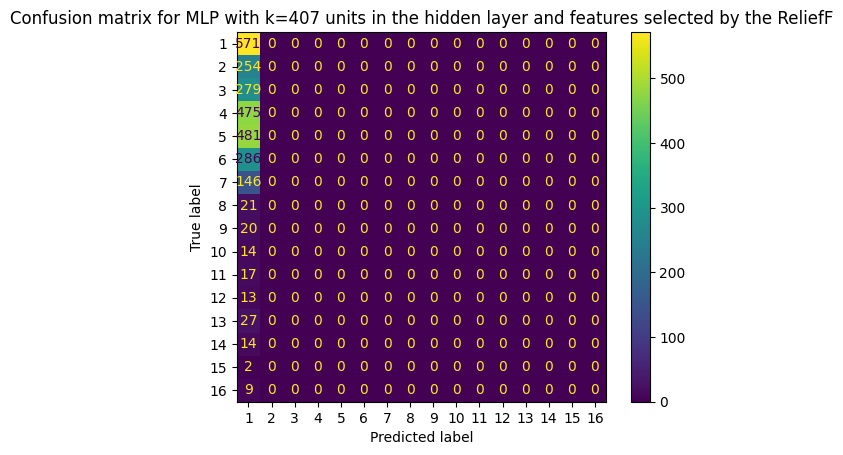

In [75]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, labels=range(1, 16+1), title=f'Confusion matrix for MLP with k={best_n_units_adapt} units in the hidden layer and features selected by the ReliefF')

Como se pode observar, ao utilizar um learning rate variável, a precisão do modelo diminui bastante, quando comparado com o learning rate constante. Neste caso, o modelo considerou todas as classes como sendo a atividade 1. O problema com o modelo poderá estar relacionado com o número de épocas com que é treinado, o número de epocas utilizado poderá ser baixo, umaz ves que o learning rate é variavel e poderá estar numa zona que faz com que o learning rate se altere muito pouco de cada vez. 

## Ex. 5 - Neural Network from scratch

In [86]:
def sigmoid(data):
        # sigmoid function
        # return scipy.special.expit(data)
        return 1/(1 + np.exp(-data))

def sigmoid_derivative(data):
    # sigmoid derivative
    # return scipy.special.logit(data)
    return np.exp(-data) / np.power( (1+np.exp(-data)), 2)

In [87]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [88]:
def evaluate(a, b):
    return np.sum(a == b) / len(a)

In [121]:
class NeuralNetwork:
    # inspired on the video https://www.youtube.com/watch?v=w8yWXqWQYmU
    def __init__(self, input_size, units_in_hidden_layer, output_size, epochs, learning_rate=0.01):
        self.weights1 = np.random.rand(units_in_hidden_layer, input_size) - 0.5
        self.bias1 = np.random.rand(units_in_hidden_layer, 1) - 0.5
        self.weights2 = np.random.rand(output_size, units_in_hidden_layer) - 0.5
        self.bias2 = np.random.rand(output_size, 1) - 0.5

        self.epochs = epochs
        self.learning_rate = learning_rate

    def forward(self, x):
        self.out1 = self.weights1.dot(x) + self.bias1
        self.output_layer1 = sigmoid(self.out1)
        self.out2 = self.weights2.dot(self.output_layer1) + self.bias2
        self.output_layer_2 = sigmoid(self.out2)

    def backward_propagation(self, x, y):
        y = one_hot(y)
        error_2 = self.output_layer_2 - y
        len_x = x.shape[0]
        d_weights2 = 1 / len_x * error_2.dot(self.output_layer1.T)
        d_bias2 = 1 / len_x * np.sum(error_2)

        error_1 = self.weights2.T.dot(error_2) * sigmoid_derivative(self.out1)
        d_weights1 = 1 / len_x * error_1.dot(x.T)
        d_bias1 = 1 / len_x * np.sum(error_1)


        # update values
        self.weights1 = self.weights1 - self.learning_rate * d_weights1
        self.bias1 = self.bias1 - self.learning_rate * d_bias1
        self.weights2 = self.weights2 - self.learning_rate * d_weights2
        self.bias2 = self.bias2 - self.learning_rate * d_bias2

    def fit(self, x, y):
        for epoch in range(self.epochs):
            self.forward(x)
            if epoch % 100 == 0:
                pred = self.predict(x)
                print(f'Epoch {epoch} -- {evaluate(y, pred) * 100}')
            self.backward_propagation(x, y)

    def predict(self, x):
        pred = self.forward(x)
        return np.argmax(self.output_layer_2, 0)

In [122]:
def scratch_best_model(x_train, x_val, y_train, y_val, output_size, step=10, init=None, max_units=200, epochs=500, learning_rate=0.01):
    max_score = 0
    best_k = 0
    scores = []
    units_list = []

    if init is None:
        init = x_train.shape[1] + 1

    for units in range(init, max_units, step):
        print(f'**********************Units {units}************************')
        model = NeuralNetwork(x_train.shape[1], units, output_size, epochs, learning_rate=learning_rate)
        model.fit(x_train.T, y_train)
        y_pred = model.predict(x_val.T)
        f1 = calculate_f1(y_val, y_pred,  'weighted')
        scores.append(f1)
        units_list.append(units)
        if f1 > max_score:
            max_score = f1
            best_k = units

    plt.figure()
    plt.plot(units_list, scores, '*-')
    plt.ylim(0, 1.05)
    plt.xlabel('No. units')
    plt.ylabel('f1-score')
    plt.title('F1-score of each number of units in the hidden layer')
    plt.show()

    print('Max f1-score: ', max_score)
    print('Best no. of neurons: ', best_k,)
    df = pd.DataFrame()
    df['f1-score'] = scores
    df['units'] = units_list
    return (df, best_k)


### Iris dataset

In [98]:
X_iris, y_iris, _ = load_dataset()
# X_iris = normalize(X_iris)
x_train_iris, x_val_iris, x_test_iris, y_train_iris, y_val_iris, y_test_iris = split_train_test_validation(X_iris, y_iris)
x_train_total_iris = pd.concat([x_train_iris, x_val_iris], ignore_index=True)
y_train_total_iris = pd.concat([y_train_iris, y_val_iris], ignore_index=True)

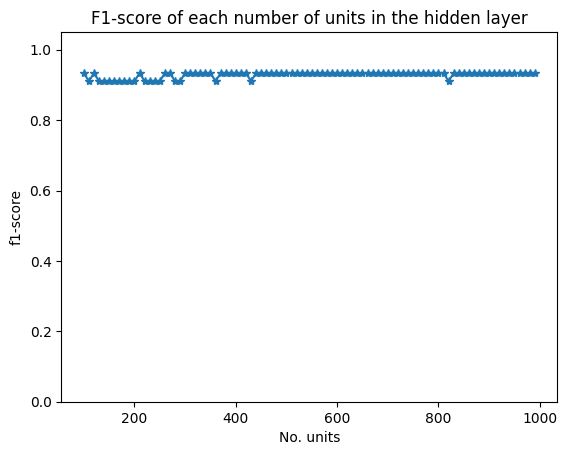

Max f1-score:  0.9333333333333333
Best no. of neurons:  100


In [110]:
df_iris, best_units_iris = scratch_best_model(
    x_train_iris.to_numpy(), x_val_iris.to_numpy(), 
    y_train_iris.to_numpy(), y_val_iris.to_numpy(),
    3,
    10,
    100,
    1000
    )

#### retrain best model

In [111]:
model = NeuralNetwork(4, best_units_iris, 3, 1000, 0.01)
model.fit(x_train_total_iris.to_numpy().T, y_train_total_iris.to_numpy())

In [112]:
y_pred_iris = model.predict(x_test_iris.to_numpy().T)

Recall: 1.0
Precision: 1.0
F-Score: 1.0


<Figure size 640x480 with 0 Axes>

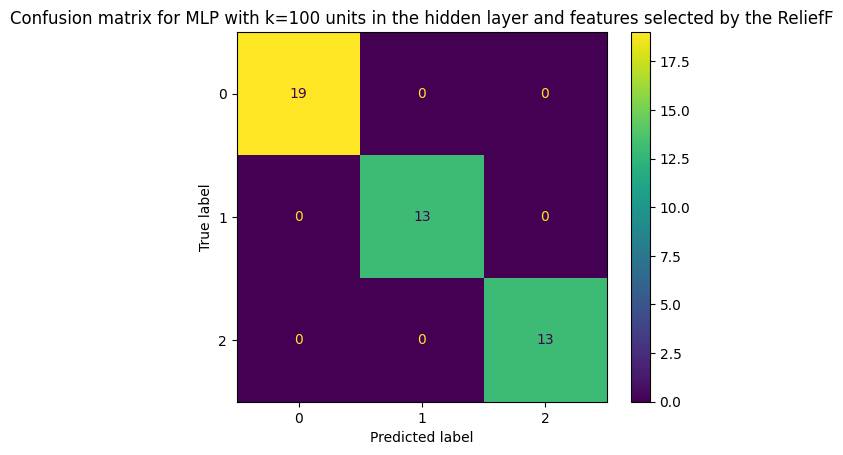

In [113]:
print('Recall:', calculate_recall(y_test_iris, y_pred_iris, 'weighted'))
print('Precision:', calculate_precision(y_test_iris, y_pred_iris, 'weighted'))
print('F-Score:', calculate_f1(y_test_iris, y_pred_iris, 'weighted'))
calculate_confusion_matrix(y_test_iris, y_pred_iris,title=f'Confusion matrix for MLP with k={best_units_iris} units in the hidden layer and features selected by the ReliefF')

Como se pode observar, a rede neuronal criada consegue classificar todas as amotras de treino. 

### Human activities dataset

In [150]:
X, y = load_activities_dataset()
X = normalize(X)
y = y - 1
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(X, y)

x_train_total = pd.concat([x_train, x_val], ignore_index=True)
y_train_total = pd.concat([y_train, y_val], ignore_index=True)

**********************Units 200************************
Epoch 0 -- 10.470756062767475
Epoch 100 -- 14.122681883024251
Epoch 200 -- 50.04279600570614
Epoch 300 -- 53.266761768901574
Epoch 400 -- 56.74750356633381
Epoch 500 -- 57.60342368045649
Epoch 600 -- 59.942938659058484
Epoch 700 -- 60.79885877318117
Epoch 800 -- 60.827389443651924
Epoch 900 -- 61.512125534950066
**********************Units 250************************
Epoch 0 -- 2.111269614835949
Epoch 100 -- 44.650499286733236
Epoch 200 -- 52.382310984308134
Epoch 300 -- 56.11982881597718
Epoch 400 -- 57.97432239657632
Epoch 500 -- 59.25820256776034
Epoch 600 -- 60.59914407988588
Epoch 700 -- 61.28388017118402
Epoch 800 -- 61.65477888730385
Epoch 900 -- 62.11126961483595
**********************Units 300************************
Epoch 0 -- 11.611982881597717
Epoch 100 -- 48.10271041369472
Epoch 200 -- 52.810271041369475
Epoch 300 -- 54.893009985734665
Epoch 400 -- 57.00427960057062
Epoch 500 -- 58.516405135520685
Epoch 600 -- 59.5720

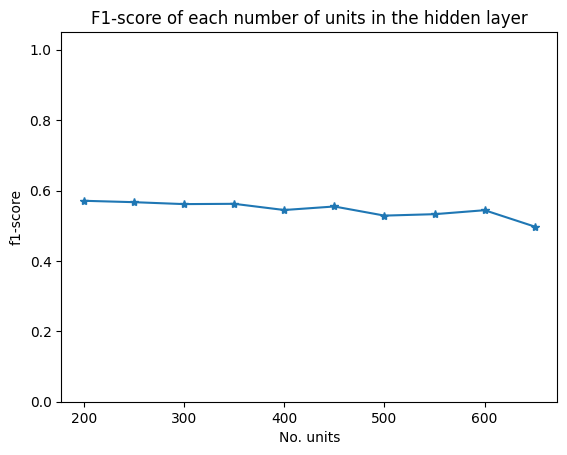

Max f1-score:  0.5708334091933015
Best no. of neurons:  200
CPU times: total: 19min 59s
Wall time: 24min 35s


In [127]:
%%time
results, best_number_neurons = scratch_best_model(
    x_train[features_to_use].to_numpy(), x_val[features_to_use].to_numpy(),
    y_train.to_numpy(), y_val.to_numpy(),
    len(y.unique()),
    50, 
    init=200,
    max_units=700, 
    epochs=1000
)

#### Lower interval

**********************Units 50************************
Epoch 0 -- 1.6547788873038518
Epoch 100 -- 49.75748930099858
Epoch 200 -- 53.6376604850214
Epoch 300 -- 56.034236804564905
Epoch 400 -- 57.51783166904422
Epoch 500 -- 58.48787446504993
Epoch 600 -- 59.62910128388017
Epoch 700 -- 60.48502139800286
Epoch 800 -- 60.99857346647646
Epoch 900 -- 61.19828815977175
**********************Units 75************************
Epoch 0 -- 23.19543509272468
Epoch 100 -- 50.556348074179745
Epoch 200 -- 55.549215406562055
Epoch 300 -- 57.68901569186876
Epoch 400 -- 59.14407988587732
Epoch 500 -- 60.313837375178316
Epoch 600 -- 60.9129814550642
Epoch 700 -- 61.14122681883024
Epoch 800 -- 61.45506419400856
Epoch 900 -- 61.85449358059915
**********************Units 100************************
Epoch 0 -- 0.5991440798858774
Epoch 100 -- 51.925820256776035
Epoch 200 -- 55.80599144079886
Epoch 300 -- 58.459343794579176
Epoch 400 -- 59.486447931526385
Epoch 500 -- 60.370898716119825
Epoch 600 -- 60.8844507845

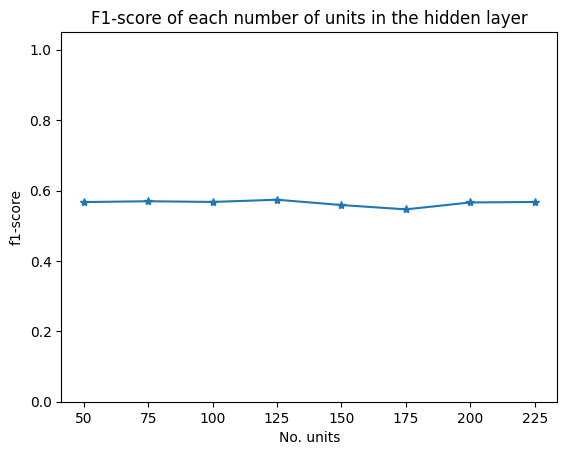

Max f1-score:  0.5738551720081112
Best no. of neurons:  125
CPU times: total: 16min 51s
Wall time: 20min 56s


In [158]:
%%time
results, best_number_neurons = scratch_best_model(
    x_train[features_to_use].to_numpy(), x_val[features_to_use].to_numpy(),
    y_train.to_numpy(), y_val.to_numpy(),
    len(y.unique()),
    25, 
    init=50,
    max_units=250, 
    epochs=1000
)

#### Retrain best model

In [159]:
model = NeuralNetwork(
    len(features_to_use),
    best_number_neurons,
    len(y.unique()),
    1000, 0.01
)

In [160]:
model.fit(
    x_train_total[features_to_use].to_numpy().T,
    y_train_total.to_numpy(),
)

Epoch 0 -- 4.434300619497881
Epoch 100 -- 47.212259537006844
Epoch 200 -- 53.619171829149
Epoch 300 -- 56.76556895989566
Epoch 400 -- 58.7707857841539
Epoch 500 -- 60.2217150309749
Epoch 600 -- 60.79230518421911
Epoch 700 -- 61.34659276165634
Epoch 800 -- 61.656341701988914
Epoch 900 -- 61.78676230844473


In [161]:
y_pred = model.predict(x_test[features_to_use].to_numpy().T)

In [162]:
y_pred = y_pred + 1
y_test = y_test + 1

Recall: 0.6356028908330164
Precision: 0.5681947972123552
F-Score: 0.5987146473698234


<Figure size 640x480 with 0 Axes>

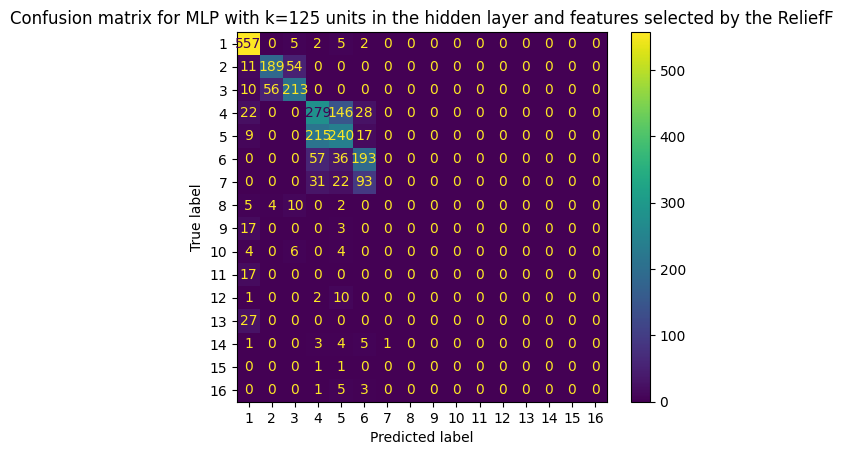

In [163]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, labels=range(1, 16+1), title=f'Confusion matrix for MLP with k={best_number_neurons} units in the hidden layer and features selected by the ReliefF')

À semelhança do MLPClassifier, é possivel observar que a rede neuronal criada tem dificuldade em classificar corretamente as atividades, ou seja, está underfitting, obtendo um f1-score um pouco mais baixo que no MLP. Como já referido, isto deve-se ao facto das atividades serem difécies de distinguir entre si, e ao facto do dataset não estar balenceado. Pela matriz de confusão, pode observar-se que o modelo mesmo assim, identifica melhor as classes que tem mais amostras no dataset, apesar de entre as atividades 4 e 5, como já referido, haver muita confusão.